In [1]:
%load_ext autoreload
%autoreload 2
from helpers import *
from networks import *
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

/Users/wlan/miniforge3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = 1 # > 10 is bad
lr = 0.0001
mom = 0.5
epochs = 50
networ_type = 'LinearRegressor' #FNN CNN1 CNN2
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [3]:
device

device(type='mps')

In [4]:
train_x, train_y, test_x, test_y = init_data("train.csv", 0.7)
train = MyDataset(train_x, train_y)
test = MyDataset(test_x, test_y)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [5]:
num_traininag_data, num_features = train.x.shape
num_test_data = len(test.y)
num_features, num_traininag_data, num_test_data

(305, 1021, 439)

In [6]:
net = eval(networ_type)()
net.to(device)
net

LinearRegressor(
  (fc): Linear(in_features=305, out_features=1, bias=True)
)

In [7]:
# criterion = nn.MSELoss()
criterion = nn.L1Loss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=mom)

In [8]:
loss_train = [compute_loss(net, train_loader, criterion, device)]
loss_test = [compute_loss(net, train_loader, criterion, device)]
print(0, loss_train[0], loss_test[0])
for epoch in range(1, epochs+1):
    tot_loss = 0.0
    net.train()
    for i, (inputs, labels) in enumerate(tqdm(train_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device) # Move to GPU / CPU
        optimizer.zero_grad() # zero the parameter gradients

        labels = labels.unsqueeze(-1)
        outputs = net(inputs)
        # print(outputs.shape, labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        tot_loss += loss.item()

    loss_train.append(tot_loss / num_traininag_data)
    loss_test.append(compute_loss(net, test_loader, criterion, device))
    print(epoch, loss_train[-1], loss_test[-1])

0 0.7895073009715082 0.7895073009715082


  0%|          | 0/1021 [00:00<?, ?it/s]/Users/wlan/miniforge3/envs/pytorch/lib/python3.9/site-packages/torch/autograd/__init__.py:197: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646703877/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 1021/1021 [00:02<00:00, 426.58it/s]


1 0.49870982114499274 0.39271547177759825


100%|██████████| 1021/1021 [00:02<00:00, 449.38it/s]


2 0.3055244720532731 0.3075179784497191


100%|██████████| 1021/1021 [00:02<00:00, 439.37it/s]


3 0.22929431624477045 0.2623655177898926


100%|██████████| 1021/1021 [00:02<00:00, 449.75it/s]


4 0.19252231717155288 0.23304573757518804


100%|██████████| 1021/1021 [00:02<00:00, 441.34it/s]


5 0.17065175586123746 0.21137369792178645


100%|██████████| 1021/1021 [00:02<00:00, 448.20it/s]


6 0.1580851814781665 0.20041751853086412


100%|██████████| 1021/1021 [00:02<00:00, 442.59it/s]


7 0.14556595632198918 0.1890163313181634


100%|██████████| 1021/1021 [00:02<00:00, 449.26it/s]


8 0.13787188271131734 0.1807983192171825


100%|██████████| 1021/1021 [00:02<00:00, 441.48it/s]


9 0.13251724243565416 0.17249021032965128


100%|██████████| 1021/1021 [00:02<00:00, 447.28it/s]


10 0.1248529222935263 0.168829627016852


100%|██████████| 1021/1021 [00:02<00:00, 441.67it/s]


11 0.11971366659525588 0.16185033166301618


100%|██████████| 1021/1021 [00:02<00:00, 446.03it/s]


12 0.11595036001715456 0.15770519745444925


100%|██████████| 1021/1021 [00:02<00:00, 442.39it/s]


13 0.11253637512352219 0.15366450687424876


100%|██████████| 1021/1021 [00:02<00:00, 446.05it/s]


14 0.10513398579589067 0.14635233790878893


100%|██████████| 1021/1021 [00:02<00:00, 442.57it/s]


15 0.10042138883924288 0.14062396835764882


100%|██████████| 1021/1021 [00:02<00:00, 445.79it/s]


16 0.09770096767051592 0.14068827646570217


100%|██████████| 1021/1021 [00:02<00:00, 441.64it/s]


17 0.09457195886336887 0.13060404286467406


100%|██████████| 1021/1021 [00:02<00:00, 438.70it/s]


18 0.08967307359837616 0.12149970051206666


100%|██████████| 1021/1021 [00:02<00:00, 443.51it/s]


19 0.08682379507652167 0.1148883492276412


100%|██████████| 1021/1021 [00:02<00:00, 442.34it/s]


20 0.08342293830703393 0.11394624822775161


100%|██████████| 1021/1021 [00:02<00:00, 445.37it/s]


21 0.07900044230888364 0.10824033474986673


100%|██████████| 1021/1021 [00:02<00:00, 442.52it/s]


22 0.07497223803361223 0.10144736479059846


100%|██████████| 1021/1021 [00:02<00:00, 444.38it/s]


23 0.07325684514177651 0.10044803268621953


100%|██████████| 1021/1021 [00:02<00:00, 442.94it/s]


24 0.06911310863322656 0.09332603809226449


100%|██████████| 1021/1021 [00:02<00:00, 448.93it/s]


25 0.0667541698934866 0.09245668704873948


100%|██████████| 1021/1021 [00:02<00:00, 441.79it/s]


26 0.06251349497539056 0.0915202708269951


100%|██████████| 1021/1021 [00:02<00:00, 448.36it/s]


27 0.05794670865401246 0.08452901937882151


100%|██████████| 1021/1021 [00:02<00:00, 441.93it/s]


28 0.0561120888148959 0.0807535157418027


100%|██████████| 1021/1021 [00:02<00:00, 449.28it/s]


29 0.05383521859362141 0.07873696691074444


100%|██████████| 1021/1021 [00:02<00:00, 441.32it/s]


30 0.052235512889786666 0.0751245354359507


100%|██████████| 1021/1021 [00:02<00:00, 449.44it/s]


31 0.04746606125474436 0.07379595844864269


100%|██████████| 1021/1021 [00:02<00:00, 441.13it/s]


32 0.04627759518588909 0.0672118907787992


100%|██████████| 1021/1021 [00:02<00:00, 449.54it/s]


33 0.0442061393084342 0.06848215692568409


100%|██████████| 1021/1021 [00:02<00:00, 441.20it/s]


34 0.042724463016425976 0.060440526508295525


100%|██████████| 1021/1021 [00:02<00:00, 456.39it/s]


35 0.03926561111422396 0.05768202395885886


100%|██████████| 1021/1021 [00:02<00:00, 443.26it/s]


36 0.038488086852784126 0.05790434301653686


100%|██████████| 1021/1021 [00:02<00:00, 448.94it/s]


37 0.03549977721353166 0.05635980134172225


100%|██████████| 1021/1021 [00:02<00:00, 443.05it/s]


38 0.035193328581245055 0.05818216566098239


100%|██████████| 1021/1021 [00:02<00:00, 451.79it/s]


39 0.0344383510854232 0.05354540281375374


100%|██████████| 1021/1021 [00:02<00:00, 444.31it/s]


40 0.03321301113462019 0.05340686383082241


100%|██████████| 1021/1021 [00:02<00:00, 451.71it/s]


41 0.031083925062084496 0.054620647837953104


100%|██████████| 1021/1021 [00:02<00:00, 443.08it/s]


42 0.031749985911897094 0.054284602858694714


100%|██████████| 1021/1021 [00:02<00:00, 448.73it/s]


43 0.0313352875698387 0.05651090303642765


100%|██████████| 1021/1021 [00:02<00:00, 443.38it/s]


44 0.031017360170180277 0.05616913506005952


100%|██████████| 1021/1021 [00:02<00:00, 450.69it/s]


45 0.03113473309331686 0.05287529173777025


100%|██████████| 1021/1021 [00:02<00:00, 442.25it/s]


46 0.030919369249025417 0.05527832971409532


100%|██████████| 1021/1021 [00:02<00:00, 449.77it/s]


47 0.031045193193652773 0.05525230443431807


100%|██████████| 1021/1021 [00:02<00:00, 444.11it/s]


48 0.030589675039133235 0.057683231264505544


100%|██████████| 1021/1021 [00:02<00:00, 446.41it/s]


49 0.030682748369576116 0.05354103749163941


100%|██████████| 1021/1021 [00:02<00:00, 442.57it/s]


50 0.030913772573648978 0.05515138815732032


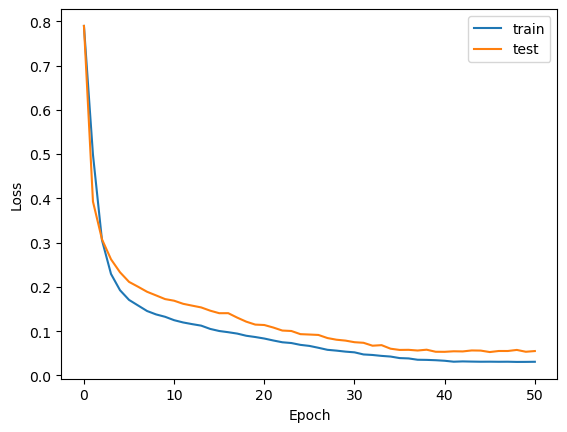

In [9]:
plt.plot(loss_train, label="train")
plt.plot(loss_test, label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
train_error = compute_rel_error(net,  train_x, train_y, device)
test_error = compute_rel_error(net, test_x, test_y, device)
avg_train_error, avg_test_error = train_error.mean().item(), test_error.mean().item()
avg_train_error, avg_test_error

(0.2458290457725525, 0.5133016705513)

In [11]:
non_outlier_train_inds, non_outlier_test_inds = torch.where(train_error < 1)[0], torch.where(test_error < 1)[0]
non_outlier_train = len(non_outlier_train_inds) / len(train_error) 
non_outlier_test = len(non_outlier_test_inds) / len(test_error)
non_outlier_train, non_outlier_test

(0.9735553379040157, 0.9635535307517085)

In [12]:
good_pred_train = train_error[non_outlier_train_inds]
good_pred_test = test_error[non_outlier_test_inds]
good_pred_train.mean().item(), good_pred_test.mean().item()

(0.07393691688776016, 0.09566318988800049)

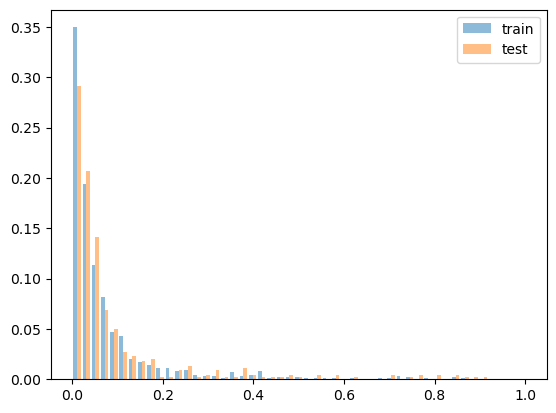

In [13]:
cpu = torch.device("cpu")
bins = np.linspace(0, 1, 50)
x, y = good_pred_train.to(cpu).numpy(), good_pred_test.to(cpu).numpy()
n, bins, patches = plt.hist([x, y], bins=bins, 
                            weights=[np.ones_like(x)/num_traininag_data, np.ones_like(y)/num_test_data],  
                            alpha=0.5, label=["train", "test"])
plt.legend()
plt.show()